In [7]:
# QUESTO FILE ANALIZZA IN MODO PIù GENERALE GLI ORDINI CON VOLUMI ALTI CON TIMEFRAME MAGGIORI UGUALI A 15 MINUTI
# L'ANALISI NON HA PORTATO AD UN RISULTATO SODDISFACENTE


from Functions import total_function_multiprocessing
from Helpers import create_event_keys
from time import sleep
from datetime import datetime
import json

# if True, the analysis starts from the current event-keys used in production
# else, it starts an analysis based on the keys in "event_keys" folder
KEEP_PRODUCTION_ANALYSIS = True

if not KEEP_PRODUCTION_ANALYSIS:
    analysis_name = 'analysis-nobuyvolume-2'
    list_minutes = '1440'
    event_keys_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/event_keys/event_keys.json"
    event_keys = create_event_keys(event_keys_path, list_minutes, analysis_name)
else:
    analysis_name = None
    riskmanagement_json_prod_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/riskmanagement.json"
    with open(riskmanagement_json_prod_path, 'r') as file:
        riskmanagement_json_prod = json.load(file)
        event_keys = list(riskmanagement_json_prod.keys())

n_processes = 8
analysis_timeframe=7

UNLOCK = True
n_iterations = 1

for i in range(n_iterations):
    if UNLOCK:
        shared_data = total_function_multiprocessing(event_keys, analysis_timeframe, n_processes, KEEP_PRODUCTION_ANALYSIS, analysis_name=analysis_name, start_interval=datetime(2024, 1, 1).isoformat()) 
        iterazione = i+1
    msg=f'{iterazione}/{n_iterations} COMPLETED'
    print(msg)

    print('sleeping')
    sleep(5)

svolume standings is up to date, loading then..
total_combinations :  23
Loading analysis_json in /Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json
start_interval at 2025-03-27T00:55:03.082617
end_interval at 2025-04-03 00:55:03.082617
/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-11-4-2025 exists. Loading the file...


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/PortableSSD/Alberto/Trading/Json/json_tracker/'

In [3]:
#DOWNLOAD AND SHOW OUTPUT FROM TOTAL MULTIPROCESSING

import sys
sys.path.insert(0,'..')
from Functions import download_show_output
from Helpers import filter_complete_info_by_current_eventkeys
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', None)

minimum_event_number = 1
minimum_event_number_list = [minimum_event_number]
mean_threshold = -10
frequency_threshold = 0
std_multiplier = 10
early_validation = False
# file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-sell-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-sell-10-250-highfrequency.json"]
KEEP_PRODUCTION_ANALYSIS = True
if KEEP_PRODUCTION_ANALYSIS:
    file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json"]
else:
    analysis_name = 'analysis-nobuyvolume-2'
    file_paths = [f"/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/{analysis_name}.json"]

start_analysis= datetime(2024,1,1)
early_validation = datetime(2026,1,1)
xth_percentile=100
filter_field='mean'
filter_position=125
output, complete_info, daily_events = download_show_output(minimum_event_number=minimum_event_number,mean_threshold=mean_threshold, frequency_threshold=frequency_threshold,
                                              early_validation=early_validation, std_multiplier=std_multiplier, file_paths=file_paths,
                                                start_analysis=start_analysis, DELETE_99_PERCENTILE=True, filter_field=filter_field, xth_percentile=xth_percentile, filter_position=filter_position)


#output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)

df = pd.DataFrame(output).transpose()
n_event_keys = len(df['mean'])
print(f'Number of event_keys: {n_event_keys}')
daily_frequency_all_events = int(sum(df['frequency/month']) / 30)
print(f'Daily frequency of events: {daily_frequency_all_events}')

df.sort_values(by=['median_max'], ascending=False)

#df.sort_values(by=['lower_bound'], ascending=False)

Number of event_keys: 40
Daily frequency of events: 24


,mean,std,max,min,median_max,median_min,standings,n_coins,n_events,upper_bound,lower_bound,frequency/month
buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150,1.12,4.47,8.20,-5.20,4.22,-3.60,100.97,246.0,991.0,5.59,-3.35,40.67
buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250,3.32,6.40,13.46,-5.05,4.07,-3.45,187.38,116.0,225.0,9.72,-3.08,9.23
buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150,0.76,4.03,7.10,-5.02,3.71,-3.46,104.61,232.0,980.0,4.79,-3.27,40.22
buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250,0.35,4.43,8.16,-5.65,3.54,-3.51,183.03,169.0,336.0,4.78,-4.08,13.79
buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50,0.53,3.30,6.08,-4.73,3.53,-3.52,31.85,95.0,679.0,3.83,-2.77,27.87
buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150,1.07,4.09,7.62,-4.82,3.51,-3.74,104.32,160.0,437.0,5.16,-3.02,17.93
buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150,0.61,3.79,6.29,-4.75,3.42,-3.34,101.23,208.0,888.0,4.40,-3.18,36.44
buy_vol_5m:0.8/vol_5m:75/timeframe:1440,-0.24,4.15,9.03,-5.56,3.40,-4.78,312.80,167.0,555.0,3.91,-4.39,22.78
buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250,1.29,5.17,9.92,-5.08,3.40,-3.64,185.11,209.0,546.0,6.46,-3.88,22.41
buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150,1.00,4.83,7.65,-4.70,3.38,-3.35,107.51,147.0,391.0,5.83,-3.83,16.05


In [2]:
daily_events

{'2024-01-01': 25,
 '2024-01-02': 39,
 '2024-01-03': 78,
 '2024-01-04': 35,
 '2024-01-05': 46,
 '2024-01-06': 22,
 '2024-01-07': 22,
 '2024-01-08': 41,
 '2024-01-09': 50,
 '2024-01-10': 39,
 '2024-01-11': 35,
 '2024-01-12': 42,
 '2024-01-13': 16,
 '2024-01-14': 21,
 '2024-01-15': 27,
 '2024-01-16': 32,
 '2024-01-17': 28,
 '2024-01-18': 37,
 '2024-01-19': 22,
 '2024-01-20': 14,
 '2024-01-21': 15,
 '2024-01-22': 34,
 '2024-01-23': 42,
 '2024-01-24': 16,
 '2024-01-25': 26,
 '2024-01-26': 25,
 '2024-01-27': 19,
 '2024-01-28': 26,
 '2024-01-29': 37,
 '2024-01-30': 45,
 '2024-01-31': 19,
 '2024-02-01': 26,
 '2024-02-02': 29,
 '2024-02-03': 25,
 '2024-02-04': 25,
 '2024-02-05': 33,
 '2024-02-07': 37,
 '2024-02-08': 40,
 '2024-02-09': 46,
 '2024-02-10': 36,
 '2024-02-11': 47,
 '2024-02-12': 49,
 '2024-02-13': 65,
 '2024-02-14': 66,
 '2024-02-15': 76,
 '2024-02-16': 57,
 '2024-02-17': 56,
 '2024-02-18': 42,
 '2024-02-19': 67,
 '2024-02-20': 90,
 '2024-02-21': 45,
 '2024-02-22': 47,
 '2024-02-23

In [ ]:
# from Helpers import filter_complete_info_by_current_eventkeys
# output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)


In [ ]:
from Helpers import create_strategy_configuration
strategy_configuration_parameters =  {
        'strategy_jump': 0.04,
        'limit': 0.25,
        'price_change_jump': 0.025,
        'max_limit': 0.2,
        'price_drop_limit': 0.05,
        'distance_jump_to_current_price': 0.01,
        'max_ask_order_distribution_level': 0.1,
        'last_i_ask_order_distribution': 1,
        'min_n_obs_jump_level': 5
    }
create_strategy_configuration(strategy_configuration_parameters)

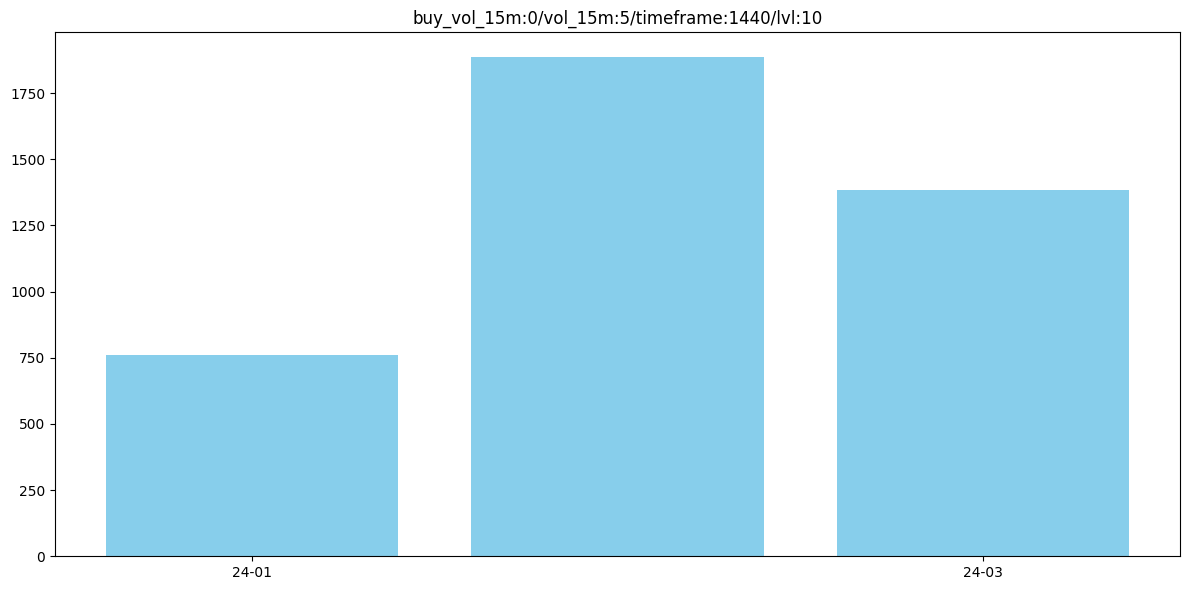

In [5]:
from Helpers import frequency_events_analysis
frequency_events_analysis(complete_info)


In [ ]:
from Analysis2023.Functions import check_investment_amount
check_investment_amount(complete_info, output, investment_amount=150)

In [2]:
from Helpers import get_timeseries
from Helpers import get_analysis


output, complete_info = get_analysis()
event_keys_filter = []
check_past=180 #minutes before event trigger
check_future=1440 #minutes after the end of event (usually after 1 days from event trigger)


info_strategy = {
        'strategy_jump': 0.04, #jump from price levels in terms of cumulative volume order (from 0 to 1)
        'limit': 0.25, #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
        'price_change_jump': 0.025, #range of price change (used in get_price_levels for bid/ask_order_distribution)
        'max_limit': 0.2,  #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
        'price_drop_limit': 0.05, #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
        'distance_jump_to_current_price': 0.01, # minimum distance from jump
        'max_ask_order_distribution_level': 0.1, # max percentage of ask volume at the first level (level is based on price_change_jump)
        'last_i_ask_order_distribution': 3, # how many last order distribution obs I consider, an np.mean is executed
        'min_n_obs_jump_level': 5
    }
save_plot=True
analyze=True
#event_keys_filter = ['buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50', 'buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150']
get_timeseries(complete_info, check_past=check_past, check_future=check_future, info_strategy=info_strategy, save_plot=save_plot, analyze=analyze)


Filtered 0 event_keys
Number of event_keys: 23
Daily frequency of events: 4



#####################################################################
1/23 Event Key: buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#####################################################################
2/23 Event Key: buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#####################################################################
3/23 Event Key: buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#############################

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, cur

Event Key: buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50
Event Key: buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150
Event Key: buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150
Event Key: buy_vol_5m:0.8/vol_5m:10/timeframe:1440/lvl:50
Event Key: buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150
Event Key: buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250
Event Key: buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150
Event Key: buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250
Event Key: buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50
Event Key: buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50
Event Key: buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250
Event Key: buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10
Event Key: buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250
Event Key: buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150
Event Key: buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50
Event Key: buy_vol_15m:0.8/vol_15m:20/timeframe:1440/lvl:250
Event Key: buy_vol_15m:0.25/vol_15m:20/timefra

Deleting 19 duplicates from initial 62 events
Number Buy Events: pre deletion: 62, post deletion: 43.
Number Total Events: pre deletion: 906, post deletion: 887.


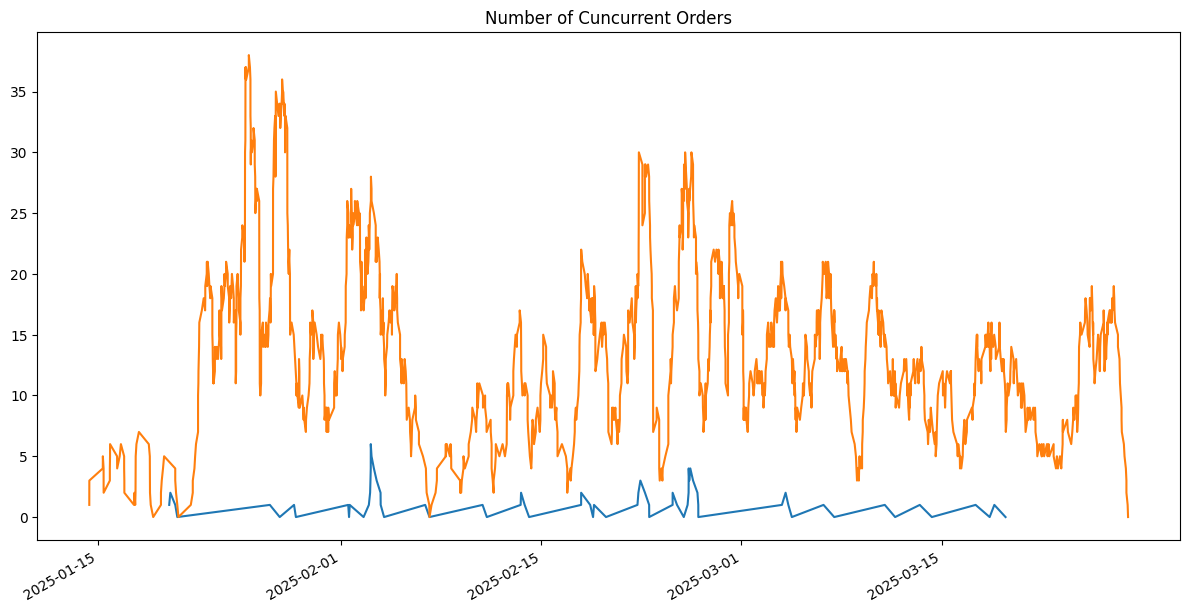

/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-11-4-2025 does not exist. Making the request to the server..
StatusCode for getting get-benchmarkinfo: 200
/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-11-4-2025 exists. Loading the file...
/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/volume_standings_2025-4-12.json does not exist


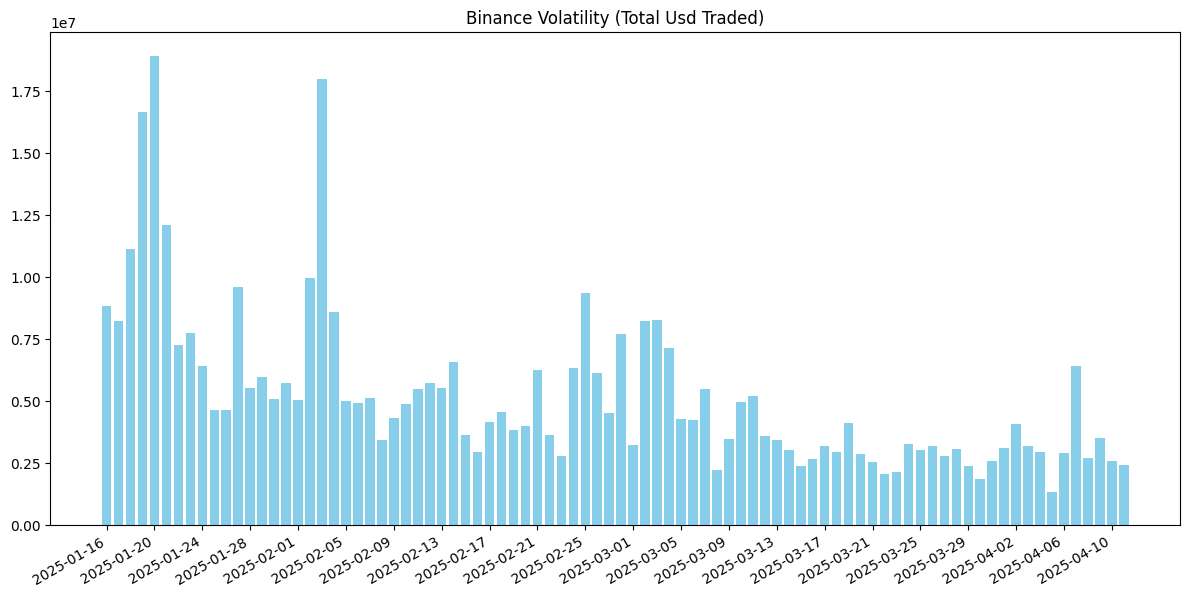

svolume standings is up to date, loading then..
Last date saved: 2025-03-27
16 days, 10:28:29.381908
Data Download from 2025-03-27T00:00:00 + 7days
Data Download from 2025-04-03T00:00:00 + 7days


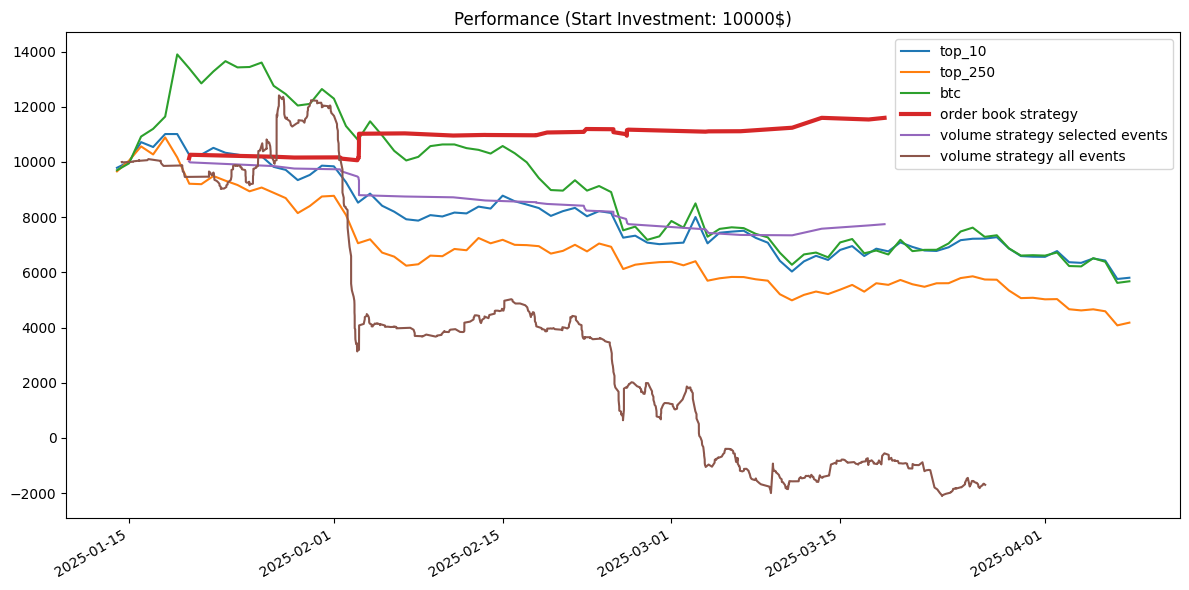

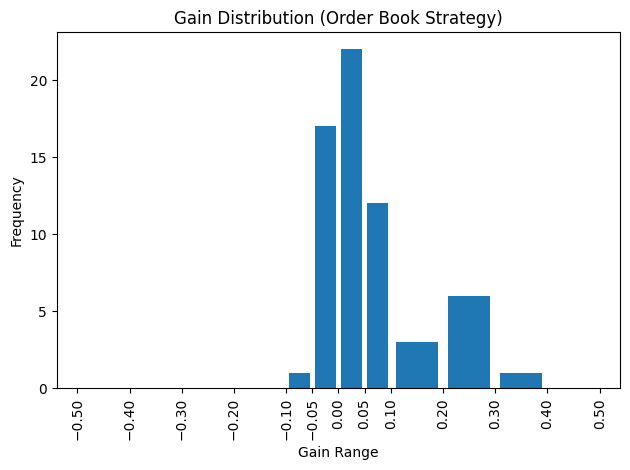

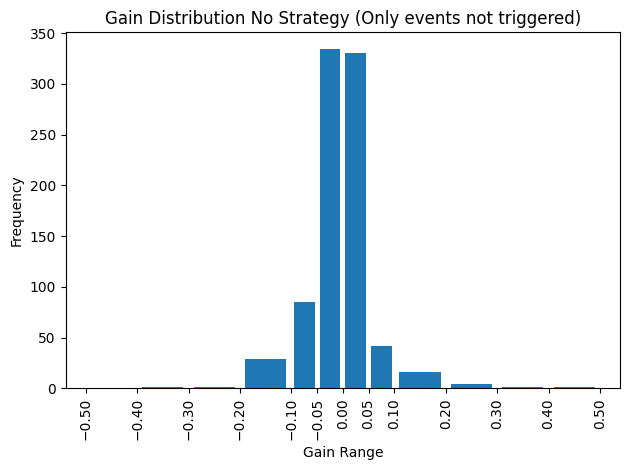

Initial Investment: 10000$
Invesment per event: 1666.67$
Commission: 85.5$
Total Investment 60000.0
Average Profit per event: 2.81%
Profit: 1598.5$
Total Observations Under Analysis: 887
Total Events triggered by strategy: 36
887


,event_keys,n_events,gain,max,min,2025-01,2025-02,2025-03,2025-04
3,buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50,2,20.58,8.33,-17.40,None,20.58 vs -1.6 / max:8.33 / min:-17.4 / n:2,None,None
12,buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50,1,14.43,0.14,-34.70,None,14.43 vs -18.01 / max:0.14 / min:-34.7 / n:1,None,None
6,buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150,2,14.35,16.97,-5.84,7.06 vs 1.15 / max:4.57 / min:-4.44 / n:1,None,21.64 vs 14.48 / max:29.37 / min:-7.24 / n:1,None
18,buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50,3,12.80,11.40,-15.87,None,20.92 vs -4.1 / max:5.49 / min:-20.8 / n:2,-3.43 vs 7.29 / max:23.23 / min:-6.01 / n:1,None
21,buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150,3,9.67,6.17,-32.23,None,9.67 vs -15.43 / max:6.17 / min:-32.23 / n:3,None,None
17,buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150,3,8.99,6.39,-11.90,None,8.99 vs -1.32 / max:6.39 / min:-11.9 / n:3,None,None
7,buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl...,3,8.79,7.53,-8.90,None,8.79 vs 0.01 / max:7.53 / min:-8.9 / n:3,None,None
2,buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150,1,7.74,4.07,-4.75,7.74 vs 0.74 / max:4.07 / min:-4.75 / n:1,None,None,None
5,buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150,3,7.48,5.34,-9.27,7.96 vs -0.31 / max:6.16 / min:-7.65 / n:2,6.52 vs -1.91 / max:3.71 / min:-12.52 / n:1,None,None
22,buy_vol_1m:0.85/vol_1m:10/timeframe:1440/lvl:10,3,7.30,0.84,-14.27,-1.81 vs -4.75 / max:1.26 / min:-8.89 / n:2,25.51 vs -10.32 / max:0.0 / min:-25.04 / n:1,None,None


In [4]:
from Helpers import plot_strategy_result
info_strategy = {
        'strategy_jump': 0.04, #jump from price levels in terms of cumulative volume order (from 0 to 1)
        'limit': 0.25, #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
        'price_change_jump': 0.025, #range of price change (used in get_price_levels for bid/ask_order_distribution)
        'max_limit': 0.2,  #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
        'price_drop_limit': 0.05, #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
        'distance_jump_to_current_price': 0.01, # minimum distance from jump
        'max_ask_order_distribution_level': 0.05, # max percentage of ask volume at the first level (level is based on price_change_jump)
        'last_i_ask_order_distribution': 3, # how many last order distribution obs I consider, an np.mean is executed
        'min_n_obs_jump_level': 5
    }
limit_n_transactions = 5
df_events_overview, df_event_keys_overview = plot_strategy_result(info_strategy, limit_n_transactions)
df_event_keys_overview.sort_values(by=['gain'], ascending=False)

In [5]:
df_events_overview

,Timestamp Buy,Timestamp Sell,Balance,Coin,Profit,Investment,Profit_vol_strat,max,min,Initial Price,Buy Price,Sell price
0,2025-01-19T23:39:00,2025-01-20T09:47:00,10128.458333,WBTCUSDT,7.85,10128.458333,1.131219,4.48,-4.40,104241.970000,99854.240000,107696.190000
1,2025-01-20T01:32:00,2025-01-20T13:15:00,10260.750000,ONEUSDT,8.08,10260.750000,-1.743097,7.83,-10.89,0.023510,0.021280,0.023000
2,2025-01-27T00:34:00,2025-01-27T17:08:00,10189.208333,SOLUSDT,-4.15,10189.208333,-7.955615,0.40,-13.72,256.380000,239.280000,229.340000
3,2025-01-28T17:09:00,2025-01-28T20:16:00,10159.666667,CFXUSDT,-1.63,10159.666667,-5.201099,4.31,-10.55,0.160200,0.147600,0.145200
4,2025-02-01T12:06:00,2025-02-01T13:27:00,10166.291667,ETHUSDT,0.54,10166.291667,-1.549323,2.13,-4.06,3362.070000,3253.000000,3270.690000
5,2025-02-01T14:38:00,2025-02-02T13:53:00,10121.750000,VIBUSDT,-2.53,10121.750000,-4.044422,7.67,-10.88,0.080800,0.075500,0.073590
6,2025-02-02T22:43:00,2025-02-03T18:34:00,10061.708333,WBETHUSDT,-3.46,10061.708333,-11.268662,0.78,-26.73,3140.280000,2997.270000,2893.580000
7,2025-02-03T00:49:00,2025-02-03T18:21:00,10168.000000,BNSOLUSDT,6.52,10168.000000,-1.909544,3.71,-12.52,207.700000,201.000000,214.100000
8,2025-02-03T01:24:00,2025-02-03T03:12:00,10149.291667,BTCUSDT,-0.98,10149.291667,-4.480521,0.50,-8.29,99974.810000,95254.910000,94324.670000
9,2025-02-03T01:54:00,2025-02-04T00:17:00,10581.416667,ALGOUSDT,26.07,10581.416667,-0.940746,9.52,-20.73,0.290900,0.250100,0.315300


In [ ]:
from Helpers import get_plots
from IPython.display import Image, display
left_gain = 0
right_gain = 1
buy_events=True
info_strategy = {
        'strategy_jump': 0.04, #jump from price levels in terms of cumulative volume order (from 0 to 1)
        'limit': 0.25, #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
        'price_change_jump': 0.025, #range of price change (used in get_price_levels for bid/ask_order_distribution)
        'max_limit': 0.2,  #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
        'price_drop_limit': 0.05, #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
        'distance_jump_to_current_price': 0.01, # minimum distance from jump
        'max_ask_order_distribution_level': 0.05, # max percentage of ask volume at the first level (level is based on price_change_jump)
        'last_i_ask_order_distribution': 1, # how many last order distribution obs I consider, an np.mean is executed
        'min_n_obs_jump_level': 5
    }
paths_png = get_plots(left_gain, right_gain, buy_events)


In [ ]:
from Helpers import get_top_crypto

response, list_datetime = get_top_crypto()
response

In [ ]:
# CREATE A GRAPH FOR VOLATILITY AND NUMBER OF OBSERVATIONS

# START TO ANALYZE ASK PRICE-LEVELS ABOVE 2.5%


In [6]:
from Helpers import get_benchmark_info, load_volume_standings
benchmark_json, df_benchmark, volatility = get_benchmark_info()
volume_standings = load_volume_standings()



/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-6-3-2025 exists. Loading the file...
svolume standings is up to date, loading then..


/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-20-3-2025 exists. Loading the file...
svolume standings is up to date, loading then..


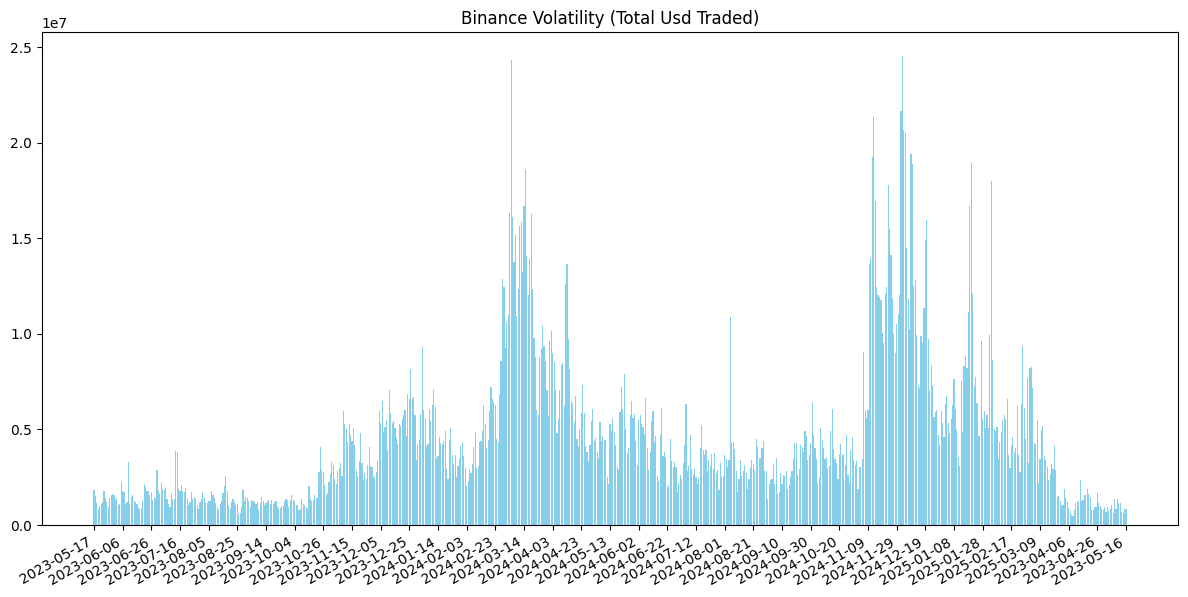

In [4]:
from datetime import datetime
from Helpers import round_
#benchmark_json
from Helpers import get_volatility_binance
start_dt=datetime(2023,1,1)
list_dts, list_volumes = get_volatility_binance(start_dt=start_dt)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(12, 6))
#ax.plot(list_dts, list_volumes)
axes.bar(list_dts, list_volumes, color='skyblue')
axes.set_xticks(list_dts[::20]) 
plt.gcf().autofmt_xdate() # Automatically rotate the date labels
plt.tight_layout()
plt.title('Binance Volatility (Total Usd Traded)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(12, 6))
#ax.plot(list_dts, list_volumes)
axes.bar(list_dts, list_volumes, color='skyblue')
axes.set_xticks(list_dts[::20]) 
plt.gcf().autofmt_xdate() # Automatically rotate the date labels
plt.tight_layout()
plt.title('Binance Volatility (Total Usd Traded)')
plt.show()